## Spotify Data Exploration

Kaggle's Spotify dataset. More info <a href="https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks">here.</a>

### Table of Contents

1. [Imports](#Imports)    
2. [Data](#Data)  
3. [EDA](#EDA)  
  3.1 [Artist](#Artist)  
  3.2 [Genre](#Genre)  
  3.3 [All](#All)  
  3.4 [Time Series](#Time_Series)


### Imports

In [1]:
# main
import numpy as np
import pandas as pd
import scipy.stats as stats
import pickle

# datetimes
import datetime as dt
from datetime import datetime
import time

# dataviz
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# plot style
%config InteractiveShellApp.pylab_import_all = False
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 7)

plt.style.use('seaborn-colorblind')

# outline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%precision %.3f

# pandas display
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Data

In [2]:
df = pd.read_csv('../data/spotify/data.csv',index_col=0)
df_a = pd.read_csv('../data/spotify/data_by_artist.csv')
df_g = pd.read_csv('../data/spotify/data_by_genres.csv')
df_y = pd.read_csv('../data/spotify/data_by_year.csv',index_col=0)

Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [3]:
# data available
len(df) # 168592 songs
len(df_a) # 27606 artists
len(df_g) # 2617 genres
len(df_y) # 100 years

168592

27606

2617

100

In [4]:
# 1 minute is 60000 ms

dfs = [df, df_a, df_g, df_y]

for d in dfs:
    d.duration_ms = (d.duration_ms / 60000).round(2)
    d.rename(columns={'duration_ms': 'duration_min'}, inplace=True)

In [5]:
# correct release date - set in one format

def correct_date(x):
    if len(x) == 4:
        return x + '-01-01'
    return x
        
df.release_date = df.release_date.map(correct_date)

df.release_date = pd.to_datetime(df.release_date, format='%Y-%m-%d')

### EDA

#### Artist

In [6]:
df_a.describe()

,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,27606.000000,27606.000000,27606.000000,27606.000000,27606.000000,27606.000000,27606.000000,27606.000000,27606.000000,27606.000000,27606.000000,27606.000000,27606.000000,27606.000000
mean,0.511213,0.540540,3.966793,0.489070,0.171924,0.203372,-11.342185,0.094928,115.405597,0.512366,34.211749,5.409512,0.773564,8.132435
std,0.369982,0.176387,2.023559,0.254124,0.296770,0.140081,5.897531,0.113778,25.177440,0.244332,22.026644,3.475562,0.418532,31.772349
min,0.000000,0.000000,0.310000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.133185,0.424693,3.030000,0.277000,0.000004,0.111333,-14.235000,0.039402,98.636917,0.329013,13.500000,2.000000,1.000000,1.000000
50%,0.507000,0.552000,3.630000,0.494000,0.001869,0.163000,-10.262017,0.052167,114.936204,0.524000,39.000000,6.000000,1.000000,2.000000
75%,0.906106,0.669000,4.440000,0.695000,0.205225,0.247000,-6.960013,0.095800,129.861625,0.702000,51.000000,8.000000,1.000000,5.000000
max,0.996000,0.986000,90.060000,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.999000,97.000000,11.000000,1.000000,2267.000000


In [7]:
# want to see one single row
df_a[df_a['artists']=='Metallica']

,artists,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
71,Metallica,0.019903,0.361825,6.09,0.90385,0.228861,0.344874,-6.288496,0.099597,124.850058,0.338508,39.891667,4,1,240


In [8]:
# top 10 popular artists
df_a.sort_values(by='popularity', ascending=False)[['artists','popularity']].head(10)

,artists,popularity
16321,THE SCOTTS,97.000000
16900,Emilee,92.000000
25350,Surf Mesa,92.000000
12758,Tones And I,90.500000
18569,DripReport,90.000000
25150,Topic,90.000000
18636,A7S,90.000000
11028,Dímelo Flow,87.666667
25479,Imanbek,87.000000
27281,Alida,87.000000


In [9]:
# top 10 productive artists - total num of tracks
df_a.sort_values(by='count', ascending=False)[['artists','count']].head(10)

,artists,count
0,Francisco Canaro,2267
1,Frédéric Chopin,1068
2,Ludwig van Beethoven,965
3,Wolfgang Amadeus Mozart,965
4,Johann Sebastian Bach,921
5,Igor Stravinsky,752
6,Frank Sinatra,736
7,Giuseppe Verdi,685
8,Billie Holiday,679
9,Ignacio Corsini,635


In [10]:
df_a.groupby('key')['artists'].count()

key
0     2793
1     2191
2     3042
3     1299
4     1635
5     2602
6     1680
7     4340
8     1407
9     2435
10    2020
11    2162
Name: artists, dtype: int64

#### Genre

In [11]:
df_g.describe()

,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000
mean,0.403324,0.534628,4.167298,0.561793,0.200779,0.194006,-10.436427,0.082506,118.752869,0.497154,40.111733,6.087505,0.866259
std,0.312706,0.146085,1.421786,0.226365,0.254757,0.088700,5.066912,0.077276,17.251700,0.195004,15.848145,3.288089,0.340439
min,0.000002,0.026642,0.790000,0.002825,0.000000,0.022200,-37.719027,0.016500,49.139281,0.004275,0.000000,0.000000,0.000000
25%,0.126027,0.447667,3.440000,0.401500,0.005414,0.143906,-12.399620,0.045550,109.604000,0.364182,32.750000,3.000000,1.000000
50%,0.332593,0.543000,3.980000,0.598404,0.081816,0.180248,-9.345000,0.059838,118.655000,0.506250,42.833333,7.000000,1.000000
75%,0.658184,0.636190,4.560000,0.726375,0.317679,0.219267,-6.984558,0.089814,127.049610,0.635153,51.000000,9.000000,1.000000
max,0.996000,0.962000,27.410000,0.999500,0.992000,0.960000,-0.131500,0.942601,204.212000,0.989000,85.000000,11.000000,1.000000


In [12]:
df_g[df_g.genres=='metal']

,genres,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
1556,metal,0.044915,0.376872,4.55,0.853354,0.201001,0.225984,-7.469937,0.08578,128.269994,0.359231,40.677016,9,1


In [13]:
# most popular genre
df_g.iloc[df_g.popularity.argmax()][['genres','popularity']]

genres        russian dance
popularity               85
Name: 2100, dtype: object

In [14]:
# most instrumental genre
df_g.iloc[df_g.instrumentalness.argmax()]['genres']

'yoga'

In [15]:
# most speechiness genre
df_g.iloc[df_g.speechiness.argmax()]['genres']

'hoerspiel'

In [16]:
# tempo?
df_g.iloc[df_g.tempo.argmax()]['genres']

'danseband'

In [17]:
# duration
df_g.iloc[df_g.duration_min.argmax()][['genres','duration_min']]

genres          microtonal
duration_min         27.41
Name: 1578, dtype: object

In [18]:
df_g['mode'].value_counts()

1    2267
0     350
Name: mode, dtype: int64

#### All

In [19]:
df.describe()

,acousticness,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,168592.000000,168592.000000,168592.00000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000
mean,0.501360,0.533648,3.87836,0.488577,0.071516,0.169476,5.196795,0.205151,-11.358180,0.709446,31.626862,0.083616,116.918295,0.528497,1977.457774
std,0.377993,0.175919,2.03986,0.267346,0.257685,0.315383,3.504587,0.175896,5.670176,0.454019,21.393260,0.119917,30.726527,0.264457,25.406757
min,0.000000,0.000000,0.09000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.097800,0.412000,2.87000,0.265000,0.000000,0.000000,2.000000,0.098200,-14.388000,0.000000,13.000000,0.034800,93.500750,0.315000,1957.000000
50%,0.515000,0.543000,3.49000,0.480000,0.000000,0.000264,5.000000,0.134000,-10.466000,1.000000,34.000000,0.044600,114.795000,0.539000,1978.000000
75%,0.896000,0.662000,4.40000,0.709000,0.000000,0.111000,8.000000,0.259000,-7.135000,1.000000,48.000000,0.072300,135.733500,0.749000,1999.000000
max,0.996000,0.988000,90.06000,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.968000,244.091000,1.000000,2020.000000


In [20]:
# longest record
df.iloc[df.duration_min.argmax()][['name','duration_min']]

name            Brown Noise - 90 Minutes
duration_min                       90.06
Name: 90154, dtype: object

In [21]:
# shortest record
df.iloc[df.duration_min.argmin()][['name','duration_min']]

name            Pause Track
duration_min           0.09
Name: 67028, dtype: object

In [22]:
# most popular artist-song
df.iloc[df.popularity.argmax()][['artists','name']]

artists     ['The Weeknd']
name       Blinding Lights
Name: 9875, dtype: object

(0, 40)

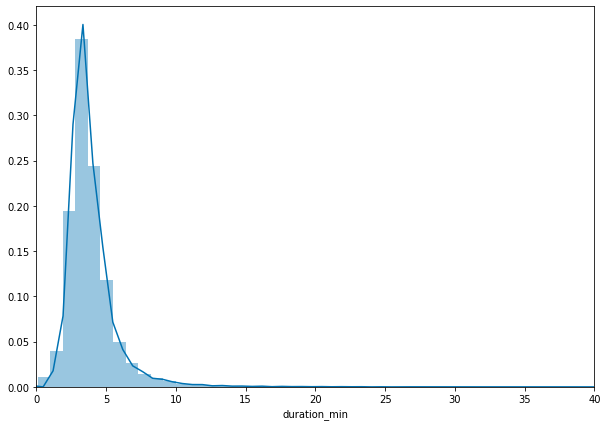

In [23]:
sns.distplot(df['duration_min'],bins=100)
plt.xlim(0,40)

In [24]:
# top 25 popular songs - on average
df.groupby(['name'])['popularity'].mean().sort_values(ascending=False).head(25)

name
death bed (coffee for your head) (feat. beabadoobee)    98.0
THE SCOTTS                                              97.0
Say So                                                  96.0
ROCKSTAR (feat. Roddy Ricch)                            96.0
Supalonely                                              95.0
ROXANNE                                                 94.0
Boss Bitch                                              93.0
Tusa                                                    93.0
SICKO MODE                                              93.0
Yo Perreo Sola                                          93.0
Safaera                                                 93.0
ily (i love you baby) (feat. Emilee)                    92.0
WHATS POPPIN                                            92.0
Don't Start Now                                         92.0
Stuck with U (with Justin Bieber)                       92.0
bad guy                                                 92.0
Blueberry Faygo    

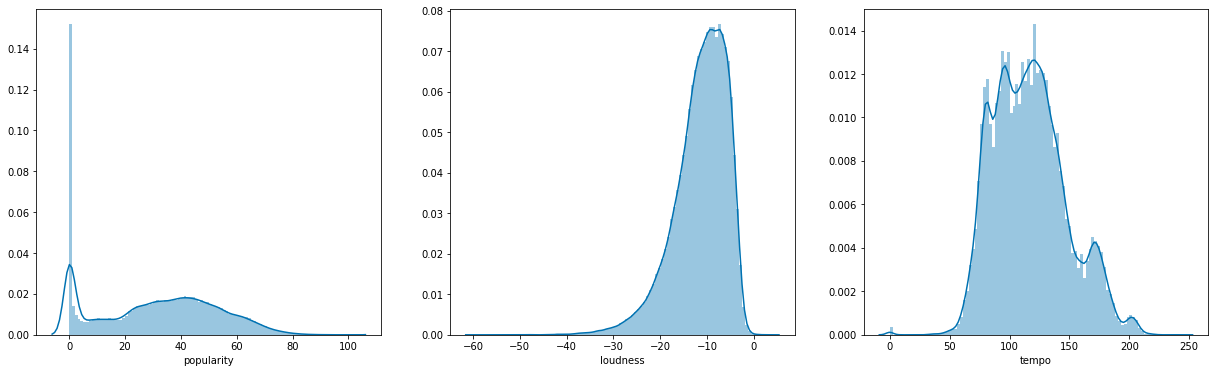

In [25]:
fig = plt.figure(figsize=(21,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.distplot(df['popularity'],bins=100,ax=ax1)
sns.distplot(df['loudness'],bins=100,ax=ax2)
sns.distplot(df['tempo'],bins=100,ax=ax3)
plt.show()

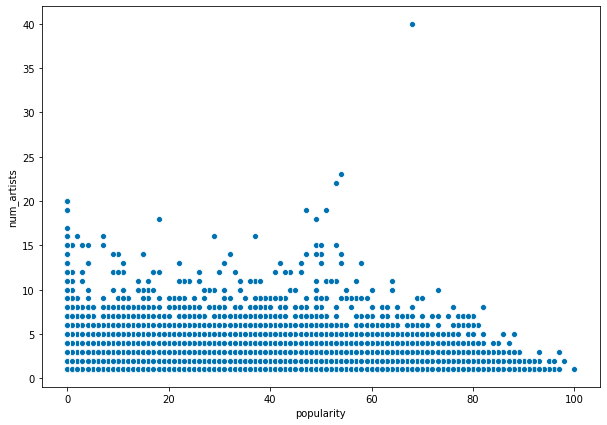

In [26]:
# number of artists per song
df['num_artists'] = df['artists'].apply(lambda x: len(x.split(',')))
sns.scatterplot(x='popularity', y='num_artists',data=df)

#### Time_Series

<Figure size 1800x432 with 0 Axes>

Text(0.5, 1.0, 'Some stats over the years')

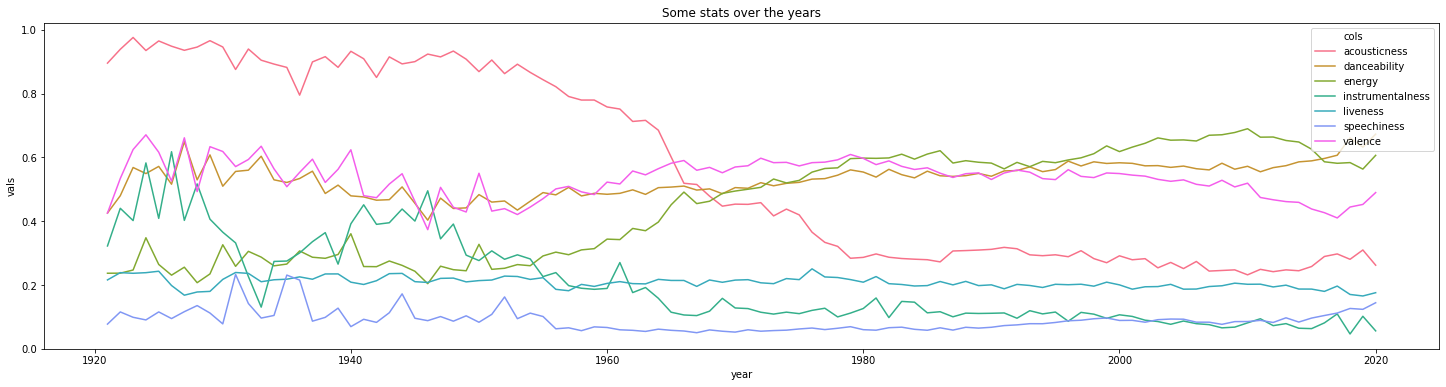

In [27]:
plt.figure(figsize=(25,6))
col_list = ['year', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
plt.title('Some stats over the years')
sns.lineplot(x='year', y='vals', hue='cols', data=df_y[col_list].melt('year', var_name='cols',  value_name='vals'))
plt.legend(loc='upper right')

- In time, acousticness has decreased whereas energy and instrumentalness (sort of) of the songs has increased.
- Danceability has increased in the last 10-15 years.

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Loudness over the years')

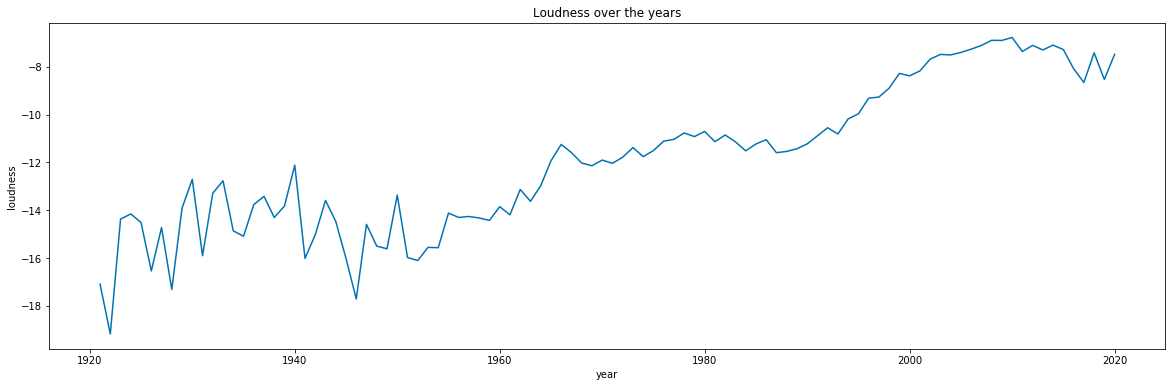

In [28]:
plt.figure(figsize=(20,6))
plt.title('Loudness over the years')
sns.lineplot(x='year',y='loudness', data=df_y)